## Zero shot analysis grouped by Modifiers Types
Broadly this script includes analysis for 4 types of modifiers:
- Universal
- Existential
- Negation
- Adverbs/Adjectives
- Original sentences from SICK (that are not modified)

Author: Sushma Anand Akoju, Email: sushmaakoju@arizona.edu

In [ ]:
# !pip install openpyxl --upgrade

In [ ]:
!pip install pycm==3.7
!pip install altair==5.0.0rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 597.6/597.6 kB 19.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.5/709.5 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd

### Connect to the Google drive
- for zero shot evaluation
- for finetuned NLI models evlaution

In [ ]:
import os
path = "/content/drive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/annotated/combined/results/zero-shot"
output_path = "/content/drive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/annotated/combined/results/fine-tuned-results"
assert os.path.exists(path), "Error"
df = pd.read_excel(os.path.join(path,"zero-shot-apr21_annotations_nli_eval.xlsx"))
print(df.columns[2:])
df = df[df.columns[2:]]
df.head()

Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified',
       'Ground Truth', 'GT', 'Quantifier Type', 'nli-deberta-v3-base',
       'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
       'pair-classification-decomposable-attention-elmo'],
      dtype='object')


,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,Ground Truth,GT,Quantifier Type,nli-deberta-v3-base,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli,pair-classification-decomposable-attention-elmo
0,90,a man is jumping into an empty pool,a man is jumping into a full pool,NONE,NONE,NONE,Alternation,Alternation,NONE,Negation,Negation,FE
1,90,every man is jumping into an empty pool,a man is jumping into a full pool,every,Premise,Subject,Alternation,Alternation,Universal,Negation,Negation,FE
2,90,a man is jumping into an empty pool,every man is jumping into a full pool,every,Hypothesis,Subject,Negation,Negation,Universal,Negation,Negation,FE
3,90,every man is jumping into an empty pool,every man is jumping into a full pool,every,Both,Subject,Negation,Negation,Universal,Negation,Negation,FE
4,90,some man is jumping into an empty pool,a man is jumping into a full pool,some,Premise,Subject,Alternation,Alternation,Existential,Negation,Negation,FE


#### Update to lower case

In [ ]:
df['Part of Premise/Hypothesis Modified'][df['Part of Premise/Hypothesis Modified'] == "Verb"] = "verb"
df['Part of Premise/Hypothesis Modified'][df['Part of Premise/Hypothesis Modified'] == "Subject"] = "subject"
df['Part of Premise/Hypothesis Modified'][df['Part of Premise/Hypothesis Modified'] == "Object"] = "object"

<ipython-input-5-1d8be39362f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Part of Premise/Hypothesis Modified'][df['Part of Premise/Hypothesis Modified'] == "Subject"] = "subject"
<ipython-input-5-1d8be39362f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Part of Premise/Hypothesis Modified'][df['Part of Premise/Hypothesis Modified'] == "Object"] = "object"


#### Subject, verb and obecjt count analsysis

In [ ]:
df.groupby(['Part of Premise/Hypothesis Modified']).count().reset_index()

,Part of Premise/Hypothesis Modified,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Ground Truth,GT,Quantifier Type,nli-deberta-v3-base,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli,pair-classification-decomposable-attention-elmo
0,NONE,44,44,44,44,44,44,36,44,44,44,44
1,object,511,511,511,511,511,511,403,511,511,511,511
2,subject,565,565,565,565,565,565,468,565,565,565,565
3,verb,225,225,225,225,225,225,180,225,225,225,225


In [ ]:
len(df['SICK_id'].unique())

15

In [ ]:
df['Ground Truth'].unique()

array(['Alternation', 'Negation', 'Neutral', 'Negation|Alternation', 'FE',
       'RE', 'Cover|FE', 'Equivalence', 'Cover'], dtype=object)

#### Have 7 Entailment Relations and compress the labels to 4
- Forward Entailment
- Reverse Entailment
- Contradiction
- Neutral

In [ ]:
df['CompressedGT'] = df['Ground Truth']
df['CompressedGT'][ df['CompressedGT'] == 'Alternation' ] = "Contradiction"
df['CompressedGT'][ df['CompressedGT'] == 'Negation' ] = "Contradiction"
df['CompressedGT'][ df['CompressedGT'] == 'Negation|Alternation' ] = "Contradiction"
d = df[(df['CompressedGT'] == 'Contradiction') | (df['CompressedGT'] == 'Neutral') | (df['CompressedGT'] == 'FE') | (df['CompressedGT'] == 'RE')]
d['nli-deberta-v3-base'][d['nli-deberta-v3-base'] == "Negation"] = "Contradiction"
d['ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli'][d['ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli'] == "Negation"] = "Contradiction"
d['pair-classification-decomposable-attention-elmo'][d['pair-classification-decomposable-attention-elmo'] == "Negation"] = "Contradiction"

<ipython-input-9-085a7c5a8065>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompressedGT'][ df['CompressedGT'] == 'Alternation' ] = "Contradiction"
<ipython-input-9-085a7c5a8065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompressedGT'][ df['CompressedGT'] == 'Negation' ] = "Contradiction"
<ipython-input-9-085a7c5a8065>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompressedGT'][ df['CompressedGT'] == 'Negatio

#### verify unique labels

In [ ]:
d['CompressedGT'].unique(), d['nli-deberta-v3-base'].unique(), d['pair-classification-decomposable-attention-elmo'].unique(), d['ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli'].unique()

(array(['Contradiction', 'Neutral', 'FE', 'RE'], dtype=object),
 array(['Contradiction', 'FE', 'RE', 'Neutral'], dtype=object),
 array(['FE'], dtype=object),
 array(['Contradiction', 'RE', 'Neutral', 'FE'], dtype=object))

#### Update NONE to No Modifiers
- are Original premise, hypothesis sentences

In [ ]:
d['Quantifier Type'][d['Quantifier Type'] == "NONE"] = "No Modifiers"

<ipython-input-12-5f30d6ba51db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Quantifier Type'][d['Quantifier Type'] == "NONE"] = "No Modifiers"
<ipython-input-12-5f30d6ba51db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Quantifier Type'][d['Quantifier Type'] == "NONE"] = "No Modifiers"


In [ ]:
qtypes = d['Quantifier Type'].unique().tolist()
d.columns

Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified',
       'Ground Truth', 'GT', 'Quantifier Type', 'nli-deberta-v3-base',
       'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
       'pair-classification-decomposable-attention-elmo', 'CompressedGT'],
      dtype='object')

In [ ]:
from pycm import *
from matplotlib import pyplot as plt

#### Drop the duplicate entries for original sentences
- we initially included original premise and hypothesis sentence pair for each set of annotated examples (one each for SUBJ, VERB and OBJ modifiers respectively).
- we remove the duplicated entries and keep only single entries for each of original premise, hypothesis pairs.

In [ ]:
len(df['SICK_id'].unique()), df['SICK_id'].unique()

(15,
 array([  90,  116,  130,  150,  167,  168,  211,  212,  455,  273,  751,
        1131,  443,  342,  129]))

In [ ]:
sick_ids = [ 90,  116,  130,  150,  167,  168,  211,  212,  455,  273,  751,
        1131,  443,  342,  129]

In [ ]:
orig_d = d[d['Quantifier Type'] == "No Modifiers"]
ind = { sickid:[] for sickid in sick_ids}
for rec in orig_d.to_records(index=True):
  print(rec)
  ind[rec[1]].append(rec[0])

(0, 90, 'a man is jumping into an empty pool', 'a man is jumping into a full pool', 'NONE', 'NONE', 'NONE', 'Alternation', 'Alternation', 'No Modifiers', 'Contradiction', 'Contradiction', 'FE', 'Contradiction')
(40, 90, 'a man is jumping into an empty pool', 'a man is jumping into a full pool', 'NONE', 'NONE', 'NONE', 'Alternation', 'Alternation', 'No Modifiers', 'Contradiction', 'Contradiction', 'FE', 'Contradiction')
(56, 90, 'A man is jumping into an empty pool', 'A man is jumping into a full pool\n', 'NONE', 'NONE', 'NONE', 'Alternation', 'Alternation', 'No Modifiers', 'Contradiction', 'Contradiction', 'FE', 'Contradiction')
(93, 116, 'a player is throwing the ball', 'two teams are competing in a football match', 'NONE', 'NONE', 'NONE', 'Neutral', 'Neutral', 'No Modifiers', 'Neutral', 'Neutral', 'FE', 'Neutral')
(133, 116, 'a player is throwing the ball', 'two teams are competing in a football match', 'NONE', 'NONE', 'NONE', 'Neutral', 'Neutral', 'No Modifiers', 'Neutral', 'Neutral

In [ ]:
repeated_indices = []
print(ind)
for sid, i in ind.items():
  repeated_indices.extend(i[1:])
d = d.drop(repeated_indices, axis='index')

{90: [0, 40, 56], 116: [93, 133, 149], 130: [186, 226, 242], 150: [279, 319, 335], 167: [372, 412, 428], 168: [465, 505, 521], 211: [558, 598, 614], 212: [651, 664, 665, 666, 691, 707], 455: [744, 784, 800], 273: [837, 877, 893], 751: [930, 970, 986], 1131: [994, 1034, 1050], 443: [1087, 1127, 1143], 342: [1180, 1220, 1236], 129: [1273, 1308]}


In [ ]:
d[d['Quantifier Type'] == "No Modifiers"]['SICK_id'].to_list()

[90, 116, 130, 150, 167, 168, 211, 212, 455, 273, 751, 1131, 443, 342, 129]

In [ ]:
len(d)

1304

In [ ]:
d

,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,Ground Truth,GT,Quantifier Type,nli-deberta-v3-base,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli,pair-classification-decomposable-attention-elmo,CompressedGT
0,90,a man is jumping into an empty pool,a man is jumping into a full pool,NONE,NONE,NONE,Alternation,Alternation,No Modifiers,Contradiction,Contradiction,FE,Contradiction
1,90,every man is jumping into an empty pool,a man is jumping into a full pool,every,Premise,subject,Alternation,Alternation,Universal,Contradiction,Contradiction,FE,Contradiction
2,90,a man is jumping into an empty pool,every man is jumping into a full pool,every,Hypothesis,subject,Negation,Negation,Universal,Contradiction,Contradiction,FE,Contradiction
3,90,every man is jumping into an empty pool,every man is jumping into a full pool,every,Both,subject,Negation,Negation,Universal,Contradiction,Contradiction,FE,Contradiction
4,90,some man is jumping into an empty pool,a man is jumping into a full pool,some,Premise,subject,Alternation,Alternation,Existential,Contradiction,Contradiction,FE,Contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,129,an old man is sitting in a field,a man is sitting in exactly one field,exactly one,Hypothesis,object,Neutral,NaN,Existential,Neutral,Neutral,FE,Neutral
1341,129,an old man is sitting in exactly one field,a man is sitting in exactly one field,exactly one,Both,object,FE,NaN,Existential,FE,FE,FE,FE
1342,129,an old man is sitting in a an elegant field,a man is sitting in a field,an elegant,Premise,object,FE,NaN,Adjectives/Adverbs,FE,FE,FE,FE
1343,129,an old man is sitting in a field,a man is sitting in a an elegant field,an elegant,Hypothesis,object,Neutral,NaN,Adjectives/Adverbs,Neutral,Neutral,FE,Neutral


##### Uncomment following line to save the clean dataset.

In [ ]:
# d.to_excel(os.path.join(path, "zero-shot-analysis-apr24.xlsx"))

#### Group by Quantifier and plot the Confusion Matrices for Zero shot results.
##### For 3 NLI models:
- 'nli-deberta-v3-base',
- 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
- 'pair-classification-decomposable-attention-elmo'

This Confusion Matrix stats is for Quantifier Type No Modifiers for nli-deberta-v3-base
Overall Statistics : 

ACC Macro                                                         0.86667
F1 Macro                                                          0.72208
FPR Macro                                                         0.10741
Kappa                                                             0.68531
Overall ACC                                                       0.8
PPV Macro                                                         0.86111
SOA1(Landis & Koch)                                               Substantial
TPR Macro                                                         0.75
Zero-one Loss                                                     3

Class Statistics :

Classes                                                           Contradiction     FE                Neutral           
ACC(Accuracy)                                                     0.86667           0.9333

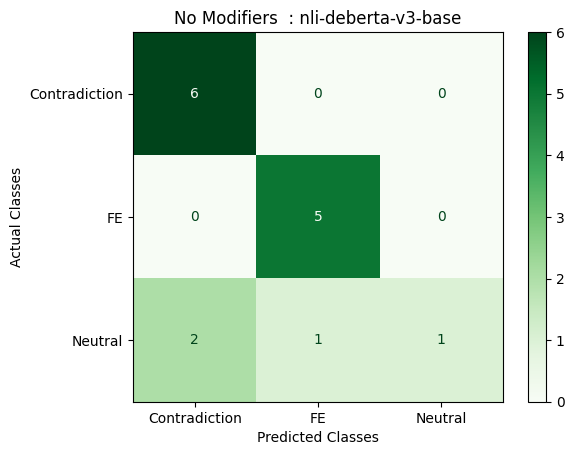

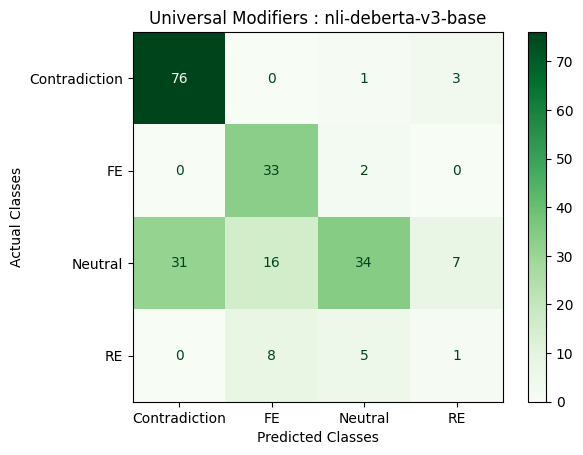

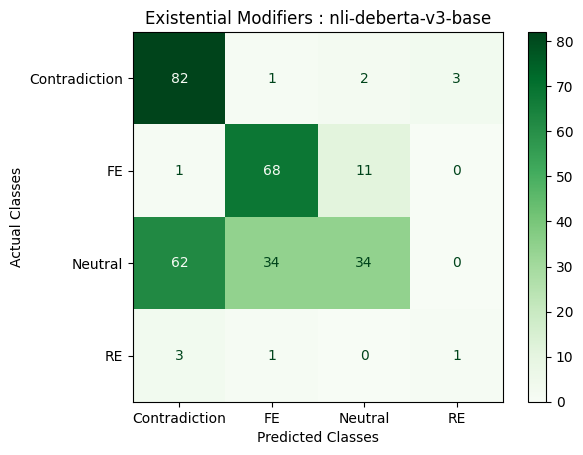

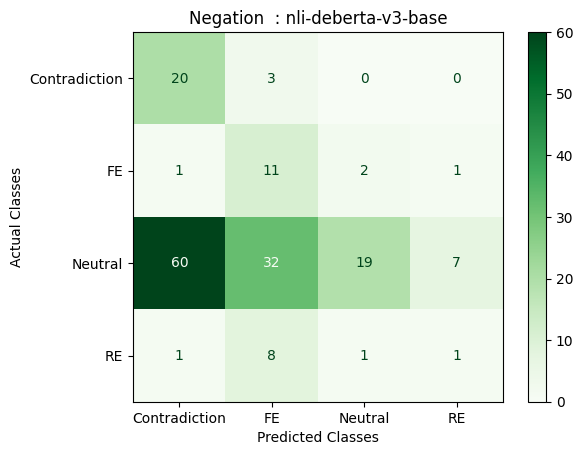

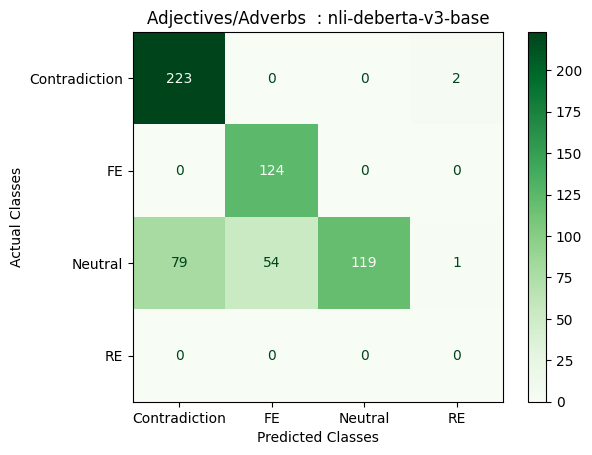

In [ ]:
for qtype in qtypes:
  print("This Confusion Matrix stats is for Quantifier Type %s for nli-deberta-v3-base"%(qtype))
  cm = ConfusionMatrix(actual_vector=d[d['Quantifier Type'] == qtype]['CompressedGT'].to_list(), predict_vector=d[d['Quantifier Type'] == qtype]['nli-deberta-v3-base'].to_list())
  cm.stat(summary=True)
  #cm.print_matrix()
  cm.plot(cmap=plt.cm.Greens,number_label=True,plot_lib="matplotlib")
  this_type = "Modifiers" if qtype not in ["Adjectives/Adverbs", "No Modifiers", "Negation"] else ""
  plt.title("%s %s : nli-deberta-v3-base"%(qtype, this_type))
  filename = qtype.replace("/","_")+"_nli-deberta-v3-base"
  # plt.savefig(os.path.join(path,filename))
  # cm.save_csv(os.path.join(path,filename))

This Confusion Matrix stats is for Quantifier Type No Modifiers for ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli
Overall Statistics : 

ACC Macro                                                         0.86667
F1 Macro                                                          0.55556
FPR Macro                                                         0.0899
Kappa                                                             0.60784
Overall ACC                                                       0.73333
PPV Macro                                                         0.58333
SOA1(Landis & Koch)                                               Substantial
TPR Macro                                                         None
Zero-one Loss                                                     4

Class Statistics :

Classes                                                           Contradiction     FE                Neutral           RE                
ACC(Accuracy)                       

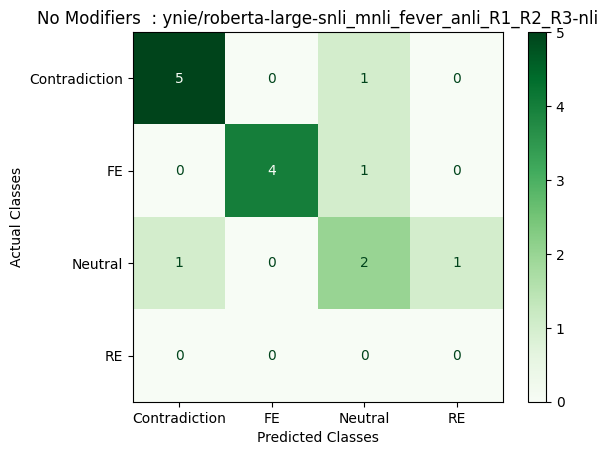

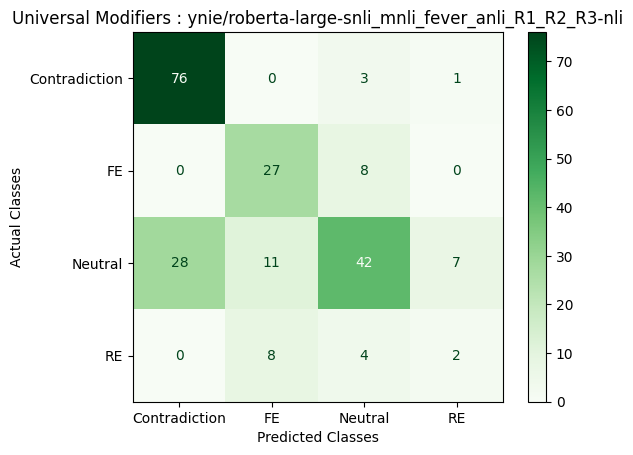

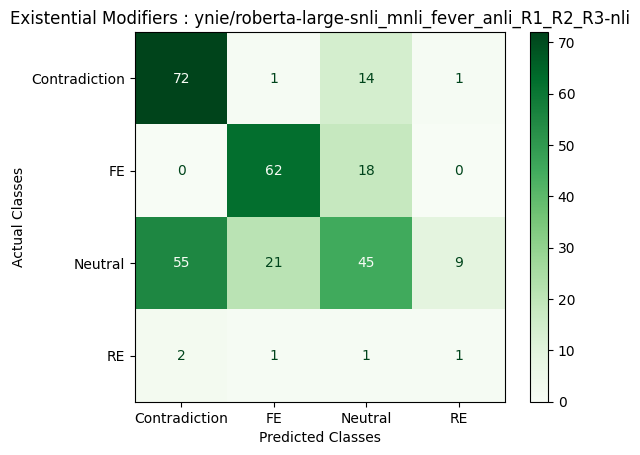

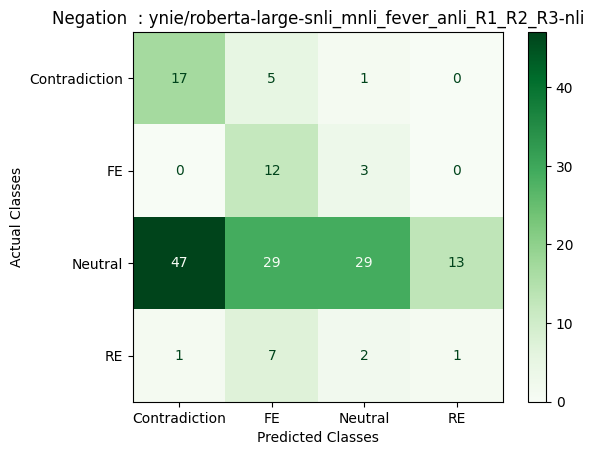

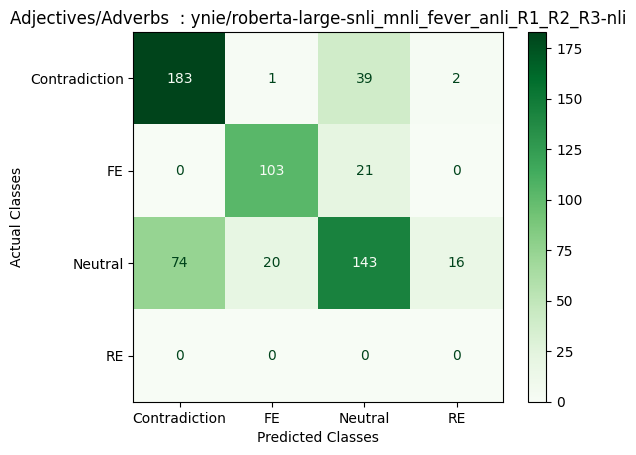

In [ ]:
for qtype in qtypes:
  model_name = 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli'
  print("This Confusion Matrix stats is for Quantifier Type %s for %s"%(qtype, model_name))
  cm = ConfusionMatrix(actual_vector=d[d['Quantifier Type'] == qtype]['CompressedGT'].to_list(), predict_vector=d[d['Quantifier Type'] == qtype][model_name].to_list())
  cm.stat(summary=True)
  #cm.print_matrix()
  cm.plot(cmap=plt.cm.Greens,number_label=True,plot_lib="matplotlib")
  this_type = "Modifiers" if qtype not in ["Adjectives/Adverbs", "No Modifiers", "Negation"] else ""
  plt.title("%s %s : %s"%(qtype, this_type, model_name))
  filename = qtype.replace("/","_")+"_"+model_name.replace("/", "_")
  # plt.savefig(os.path.join(path,filename))
  # cm.save_csv(os.path.join(path,filename))

This Confusion Matrix stats is for Quantifier Type No Modifiers for pair-classification-decomposable-attention-elmo
Overall Statistics : 

ACC Macro                                                         0.55556
F1 Macro                                                          0.16667
FPR Macro                                                         0.33333
Kappa                                                             0.0
Overall ACC                                                       0.33333
PPV Macro                                                         None
SOA1(Landis & Koch)                                               Slight
TPR Macro                                                         0.33333
Zero-one Loss                                                     10

Class Statistics :

Classes                                                           Contradiction     FE                Neutral           
ACC(Accuracy)                                                     

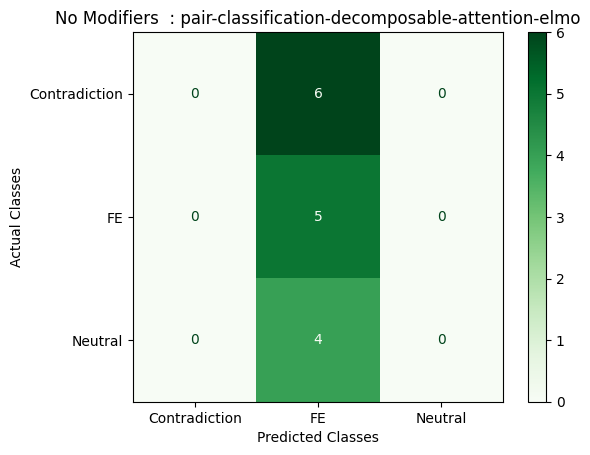

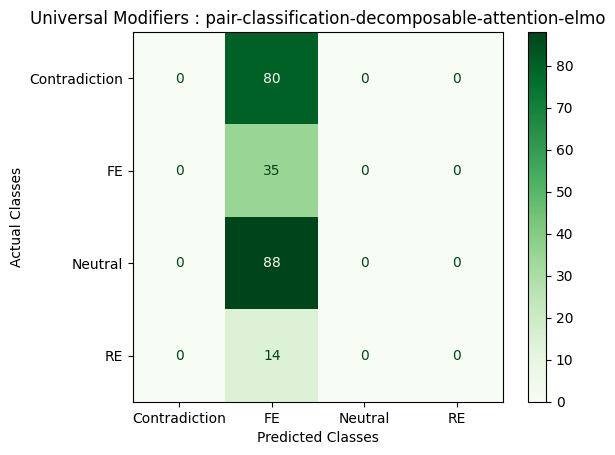

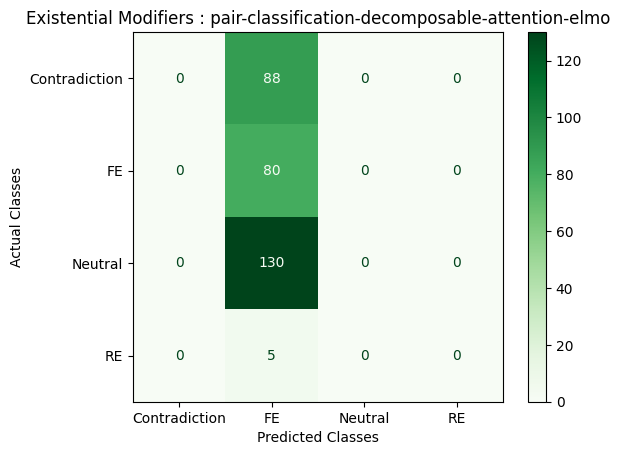

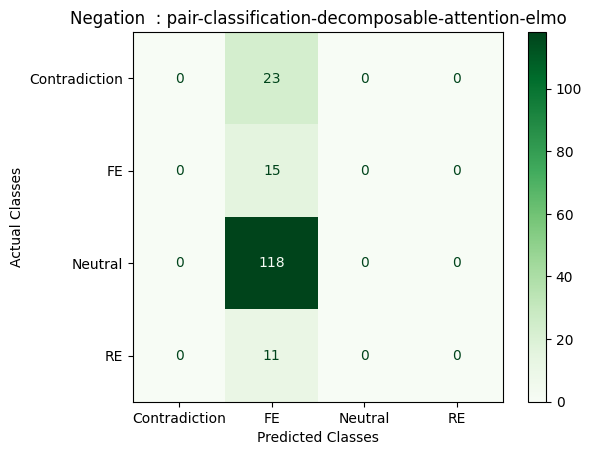

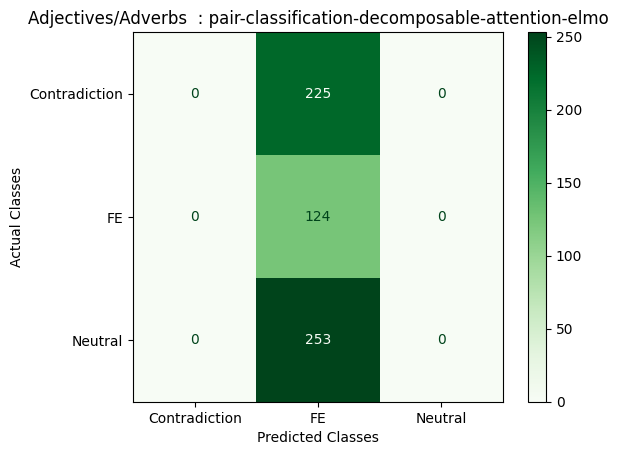

In [ ]:
for qtype in qtypes:
  model_name = 'pair-classification-decomposable-attention-elmo'
  print("This Confusion Matrix stats is for Quantifier Type %s for %s"%(qtype, model_name))
  cm = ConfusionMatrix(actual_vector=d[d['Quantifier Type'] == qtype]['CompressedGT'].to_list(), predict_vector=d[d['Quantifier Type'] == qtype][model_name].to_list())
  cm.stat(summary=True)
  #cm.print_matrix()
  cm.plot(cmap=plt.cm.Greens,number_label=True,plot_lib="matplotlib")
  this_type = "Modifiers" if qtype not in ["Adjectives/Adverbs", "No Modifiers", "Negation"] else ""
  plt.title("%s %s : %s"%(qtype, this_type, model_name))
  filename = qtype.replace("/","_")+"_"+model_name.replace("/", "_")
  # plt.savefig(os.path.join(path,filename))
  # cm.save_csv(os.path.join(path,filename))

In [ ]:
d.columns

Index(['SICK_id', 'Premise', 'Hypothesis', 'Modifier',
       'Premise/Hypothesis/Both', 'Part of Premise/Hypothesis Modified',
       'Ground Truth', 'GT', 'Quantifier Type', 'nli-deberta-v3-base',
       'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
       'pair-classification-decomposable-attention-elmo', 'CompressedGT'],
      dtype='object')

In [ ]:
d.reset_index()

,index,SICK_id,Premise,Hypothesis,Modifier,Premise/Hypothesis/Both,Part of Premise/Hypothesis Modified,Ground Truth,GT,Quantifier Type,nli-deberta-v3-base,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli,pair-classification-decomposable-attention-elmo,CompressedGT
0,0,90,a man is jumping into an empty pool,a man is jumping into a full pool,NONE,NONE,NONE,Alternation,Alternation,No Modifiers,Contradiction,Contradiction,FE,Contradiction
1,1,90,every man is jumping into an empty pool,a man is jumping into a full pool,every,Premise,subject,Alternation,Alternation,Universal,Contradiction,Contradiction,FE,Contradiction
2,2,90,a man is jumping into an empty pool,every man is jumping into a full pool,every,Hypothesis,subject,Negation,Negation,Universal,Contradiction,Contradiction,FE,Contradiction
3,3,90,every man is jumping into an empty pool,every man is jumping into a full pool,every,Both,subject,Negation,Negation,Universal,Contradiction,Contradiction,FE,Contradiction
4,4,90,some man is jumping into an empty pool,a man is jumping into a full pool,some,Premise,subject,Alternation,Alternation,Existential,Contradiction,Contradiction,FE,Contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1340,129,an old man is sitting in a field,a man is sitting in exactly one field,exactly one,Hypothesis,object,Neutral,NaN,Existential,Neutral,Neutral,FE,Neutral
1300,1341,129,an old man is sitting in exactly one field,a man is sitting in exactly one field,exactly one,Both,object,FE,NaN,Existential,FE,FE,FE,FE
1301,1342,129,an old man is sitting in a an elegant field,a man is sitting in a field,an elegant,Premise,object,FE,NaN,Adjectives/Adverbs,FE,FE,FE,FE
1302,1343,129,an old man is sitting in a field,a man is sitting in a an elegant field,an elegant,Hypothesis,object,Neutral,NaN,Adjectives/Adverbs,Neutral,Neutral,FE,Neutral


In [ ]:
len(d[d['Quantifier Type'] == "No Modifiers"])

15

#### F1, Precision, recall and Accuracy for Zero shot results. (Desiderata)
##### For 3 NLI models:
- 'nli-deberta-v3-base',
- 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
- 'pair-classification-decomposable-attention-elmo'

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
model_names = ['nli-deberta-v3-base',
       'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
       'pair-classification-decomposable-attention-elmo']
gt = 'CompressedGT'
scores = []
for model_name in model_names:
  tn, fp, fn, tp = confusion_matrix(d[gt].to_list(), d[model_name].to_list()).ravel()
  precision= precision_score(d[gt].to_list(), d[model_name].to_list())
  f1 = f1_score(d[gt].to_list(), d[model_name].to_list(),average='micro')
  recall = recall_score(d[gt].to_list(), d[model_name].to_list())
  acc = accuracy_score(d[gt].to_list(), d[model_name].to_list())
  scores.append({"model_name":model_name,"f1":f1, "precision":precision, "recall":recall, "accuracy":acc})

NameError: ignored

In [ ]:
scores

[{'model_name': 'nli-deberta-v3-base',
  'f1': 0.6579754601226994,
  'precision': 0.6579754601226994,
  'recall': 0.6579754601226994,
  'accuracy': 0.6579754601226994},
 {'model_name': 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
  'f1': 0.6334355828220859,
  'precision': 0.6334355828220859,
  'recall': 0.6334355828220859,
  'accuracy': 0.6334355828220859},
 {'model_name': 'pair-classification-decomposable-attention-elmo',
  'f1': 0.19861963190184045,
  'precision': 0.19861963190184048,
  'recall': 0.19861963190184048,
  'accuracy': 0.19861963190184048}]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
model_names = ['nli-deberta-v3-base',
       'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
       'pair-classification-decomposable-attention-elmo']
gt = 'CompressedGT'
qscores = []
for qtype in qtypes:
  for model_name in model_names:
    precision = precision_score(d[d['Quantifier Type'] == qtype][gt].to_list(), d[d['Quantifier Type'] == qtype][model_name].to_list(), average='micro')
    f1 = f1_score(d[d['Quantifier Type'] == qtype][gt].to_list(), d[d['Quantifier Type'] == qtype][model_name].to_list(),average='micro')
    recall = recall_score(d[d['Quantifier Type'] == qtype][gt].to_list(), d[d['Quantifier Type'] == qtype][model_name].to_list(), average='micro')
    acc = accuracy_score(d[d['Quantifier Type'] == qtype][gt].to_list(), d[d['Quantifier Type'] == qtype][model_name].to_list())
    qscores.append({"model_name":model_name,"quantifier_type":qtype,"f1":f1, "precision":precision, "recall":recall, "accuracy":acc})

In [ ]:
qscores

[{'model_name': 'nli-deberta-v3-base',
  'quantifier_type': 'No Modifiers',
  'f1': 0.8000000000000002,
  'precision': 0.8,
  'recall': 0.8,
  'accuracy': 0.8},
 {'model_name': 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
  'quantifier_type': 'No Modifiers',
  'f1': 0.7333333333333333,
  'precision': 0.7333333333333333,
  'recall': 0.7333333333333333,
  'accuracy': 0.7333333333333333},
 {'model_name': 'pair-classification-decomposable-attention-elmo',
  'quantifier_type': 'No Modifiers',
  'f1': 0.3333333333333333,
  'precision': 0.3333333333333333,
  'recall': 0.3333333333333333,
  'accuracy': 0.3333333333333333},
 {'model_name': 'nli-deberta-v3-base',
  'quantifier_type': 'Universal',
  'f1': 0.663594470046083,
  'precision': 0.663594470046083,
  'recall': 0.663594470046083,
  'accuracy': 0.663594470046083},
 {'model_name': 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
  'quantifier_type': 'Universal',
  'f1': 0.6774193548387096,
  'precision': 0.6774193548387096

##### Uncomment the following lines to save the evaluation results.

In [ ]:
# pd.DataFrame(scores).to_csv(os.path.join(path, "zero_shot_scores.xlsx"))
# pd.DataFrame(qscores).to_csv(os.path.join(path, "zero_shot_modifier_scores.xlsx"))

#### F1, Precision, recall and accuracy - Grouped by Subject Verb Object (SVO) of the Zero shot analysis.
##### For 3 NLI models:
- 'nli-deberta-v3-base',
- 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
- 'pair-classification-decomposable-attention-elmo'

In [ ]:
svo = "Part of Premise/Hypothesis Modified"
d[svo] = d[svo].str.lower()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
model_names = ['nli-deberta-v3-base',
       'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
       'pair-classification-decomposable-attention-elmo']
gt = 'CompressedGT'
svo_scores = []
for svo_type in d[svo].unique():
  for model_name in model_names:
    precision = precision_score(d[d[svo] == svo_type][gt].to_list(), d[d[svo] == svo_type][model_name].to_list(), average='micro')
    f1 = f1_score(d[d[svo] == svo_type][gt].to_list(), d[d[svo] == svo_type][model_name].to_list(),average='micro')
    recall = recall_score(d[d[svo] == svo_type][gt].to_list(), d[d[svo] == svo_type][model_name].to_list(), average='micro')
    acc = accuracy_score(d[d[svo] == svo_type][gt].to_list(), d[d[svo] == svo_type][model_name].to_list())
    svo_scores.append({"model_name":model_name,"svo_type":svo_type,"f1":f1, "precision":precision, "recall":recall, "accuracy":acc})

In [ ]:
svo_scores

[{'model_name': 'nli-deberta-v3-base',
  'svo_type': 'none',
  'f1': 0.8000000000000002,
  'precision': 0.8,
  'recall': 0.8,
  'accuracy': 0.8},
 {'model_name': 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
  'svo_type': 'none',
  'f1': 0.7333333333333333,
  'precision': 0.7333333333333333,
  'recall': 0.7333333333333333,
  'accuracy': 0.7333333333333333},
 {'model_name': 'pair-classification-decomposable-attention-elmo',
  'svo_type': 'none',
  'f1': 0.3333333333333333,
  'precision': 0.3333333333333333,
  'recall': 0.3333333333333333,
  'accuracy': 0.3333333333333333},
 {'model_name': 'nli-deberta-v3-base',
  'svo_type': 'subject',
  'f1': 0.6428571428571429,
  'precision': 0.6428571428571429,
  'recall': 0.6428571428571429,
  'accuracy': 0.6428571428571429},
 {'model_name': 'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
  'svo_type': 'subject',
  'f1': 0.6053571428571428,
  'precision': 0.6053571428571428,
  'recall': 0.6053571428571428,
  'accuracy': 0.605357142

##### Uncomment the following lines to save the SVO scores.

In [ ]:
# pd.DataFrame(svo_scores).to_csv(os.path.join(path, "zero_shot_modified_svo_scores.xlsx"))

In [ ]:
# !pip install altair

In [ ]:
import altair as alt

source = pd.DataFrame.from_dict(scores)
source.head()

,model_name,f1,precision,recall,accuracy
0,nli-deberta-v3-base,0.657975,0.657975,0.657975,0.657975
1,ynie/roberta-large-snli_mnli_fever_anli_R1_R2_...,0.633436,0.633436,0.633436,0.633436
2,pair-classification-decomposable-attention-elmo,0.198620,0.198620,0.198620,0.198620


In [ ]:
source['model_name'].unique()

array(['nli-deberta-v3-base',
       'ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli',
       'pair-classification-decomposable-attention-elmo'], dtype=object)

In [ ]:
source = pd.DataFrame.from_dict(scores)
source['model_name'][source['model_name'] == "nli-deberta-v3-base"] = "deberta"
source['model_name'][source['model_name'] == "ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli"]= "roberta"
source['model_name'][source['model_name'] == "pair-classification-decomposable-attention-elmo"] = "elmo"
print(source.sort_values('f1'))
sorted = source.sort_values('f1')

  model_name        f1  precision    recall  accuracy
2       elmo  0.198620   0.198620  0.198620  0.198620
1    roberta  0.633436   0.633436  0.633436  0.633436
0    deberta  0.657975   0.657975  0.657975  0.657975


<ipython-input-43-ec415d919b2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['model_name'][source['model_name'] == "nli-deberta-v3-base"] = "deberta"
<ipython-input-43-ec415d919b2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source['model_name'][source['model_name'] == "ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli"]= "roberta"
<ipython-input-43-ec415d919b2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sour

In [ ]:
line1 = alt.Chart(sorted[sorted['model_name'] == 'deberta'][ ['f1']]).mark_rule().encode(y='f1', color='f1')
line2 = alt.Chart(sorted[sorted['model_name'] == 'roberta'][ ['f1']]).mark_rule().encode(y='f1', color='f1')
line3 = alt.Chart(sorted[sorted['model_name'] == 'elmo'][ ['f1']]).mark_rule().encode(y='f1', color='f1')

In [ ]:
sorted[sorted['model_name'] == 'deberta'][['f1']]

,f1
0,0.657975


In [ ]:
qsource = pd.DataFrame.from_dict(qscores)
qsource['model_name'][qsource['model_name'] == "nli-deberta-v3-base"] = "deberta"
qsource['model_name'][qsource['model_name'] == "ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli"]= "roberta"
qsource['model_name'][qsource['model_name'] == "pair-classification-decomposable-attention-elmo"] = "elmo"
all = pd.concat([source, qsource])
all.head()

<ipython-input-46-5609f1ab582e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qsource['model_name'][qsource['model_name'] == "nli-deberta-v3-base"] = "deberta"
<ipython-input-46-5609f1ab582e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qsource['model_name'][qsource['model_name'] == "ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli"]= "roberta"
<ipython-input-46-5609f1ab582e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,model_name,f1,precision,recall,accuracy,quantifier_type
0,deberta,0.657975,0.657975,0.657975,0.657975,NaN
1,roberta,0.633436,0.633436,0.633436,0.633436,NaN
2,elmo,0.198620,0.198620,0.198620,0.198620,NaN
0,deberta,0.800000,0.800000,0.800000,0.800000,No Modifiers
1,roberta,0.733333,0.733333,0.733333,0.733333,No Modifiers


In [ ]:
import numpy as np
all['quantifier_type'] = all['quantifier_type'].fillna("All")
all['quantifier_type']

0                    All
1                    All
2                    All
0           No Modifiers
1           No Modifiers
2           No Modifiers
3              Universal
4              Universal
5              Universal
6            Existential
7            Existential
8            Existential
9               Negation
10              Negation
11              Negation
12    Adjectives/Adverbs
13    Adjectives/Adverbs
14    Adjectives/Adverbs
Name: quantifier_type, dtype: object

In [ ]:
all[(all['model_name'] == "deberta") &(all['quantifier_type'] != "All") ]

,model_name,f1,precision,recall,accuracy,quantifier_type
0,deberta,0.800000,0.800000,0.800000,0.800000,No Modifiers
3,deberta,0.663594,0.663594,0.663594,0.663594,Universal
6,deberta,0.610561,0.610561,0.610561,0.610561,Existential
9,deberta,0.305389,0.305389,0.305389,0.305389,Negation
12,deberta,0.774086,0.774086,0.774086,0.774086,Adjectives/Adverbs


In [ ]:
deberta = all[(all['model_name'] == "deberta") &(all['quantifier_type'] != "All") ]
deberta

,model_name,f1,precision,recall,accuracy,quantifier_type
0,deberta,0.800000,0.800000,0.800000,0.800000,No Modifiers
3,deberta,0.663594,0.663594,0.663594,0.663594,Universal
6,deberta,0.610561,0.610561,0.610561,0.610561,Existential
9,deberta,0.305389,0.305389,0.305389,0.305389,Negation
12,deberta,0.774086,0.774086,0.774086,0.774086,Adjectives/Adverbs


In [ ]:
lines = alt.Chart(all.sort_values('f1'),title="Scores for Zero-shot Analysis").mark_line().encode(
    x=alt.X('model_name:O',axis=alt.Axis(labelAngle=-45),sort='-y'),
    y=alt.Y('f1:Q'),
    color='quantifier_type:N',size=alt.value(1)
).properties(width=400, height = 200)

lines

alt.Chart(...)

#### Commented.

In [ ]:


# base = alt.Chart(all).properties(width=450, height = 200)

# points = alt.Chart(source.sort_values('f1'),title="Overall scores for Zero-shot Analysis").mark_point().encode(
#     x=alt.X('model_name:N',axis=alt.Axis(labelAngle=-45),sort='-y'),
#     y=alt.Y('f1:Q'),
#     color='model_name:N',size=alt.value(12)
# ).properties(width=400, height = 200)
# text = points.mark_text(
#     align='left',
#     baseline='middle',
#     dx=7
# ).encode(
#     text=alt.Text('f1', format=".2f")
# )

# line = base.mark_line().encode(
#     x='date',
#     y='price',
#     color='symbol'
# )
# rule = base.mark_rule().encode(
#     y='average(price)',
#     color='symbol',
#     size=alt.value(2)
# )

# rule = base.mark_rule().encode(
#     y='average(price)',
#     color='symbol',
#     size=alt.value(2)
# )

# line + rule

In [ ]:
points = alt.Chart(source.sort_values('f1'),title="Overall scores for Zero-shot Analysis").mark_point().encode(
    x=alt.X('model_name:N',axis=alt.Axis(labelAngle=-45),sort='-y'),
    y=alt.Y('f1:Q'),
    color='model_name:N',size=alt.value(12)
).properties(width=400, height = 200)
text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text=alt.Text('f1', format=".2f")
)

points + text

alt.LayerChart(...)

In [ ]:
# alt.themes.enable('my_theme')
qtypes = all['quantifier_type'].to_list()
range_ = ['lightsteelblue','steelblue', 'lightgray','gray','dodgerblue', 'lightskyblue']
bars = alt.Chart(all.sort_values('f1')).mark_bar().encode(
    x=alt.X("model_name:N", axis=alt.Axis(labelAngle=-0)),
    y="f1:Q",
    xOffset="quantifier_type:N",
    color=alt.Color("quantifier_type:N").scale(domain=qtypes, range=range_)
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text=alt.Text('f1', format=".2f")
)

bars + text

alt.LayerChart(...)

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/natural-logic/final-datasets/block-wise-data/blocks-dec26/annotated/combined/results/zero-shot
!ls

In [ ]:
# model_paths = [os.path.join(output_path) for model_name in ["nli-deberta-v3-base", "roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli"]]
# model_paths